In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
import pandas as pd
from scipy.signal import butter, lfilter

In [11]:
sound = 'Turbulence - vmlk.wav'

samplerate, data = wavfile.read(sound)
print('Sampling Rate:', samplerate)
print('Audio Shape:', np.shape(data))

duration = len(data) / samplerate
time = np.arange(0, duration, 1 / samplerate) # Vector

print(f"Длительность {duration} секунд\nВременная шкала {time}\nРазмерность времени {len(time)}")

channel1 = data[:,0]
channel2 = data[:,1]

Sampling Rate: 44100
Audio Shape: (6447742, 2)
Длительность 146.2073015873016 секунд
Временная шкала [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 1.46207234e+02
 1.46207256e+02 1.46207279e+02]
Размерность времени 6447742


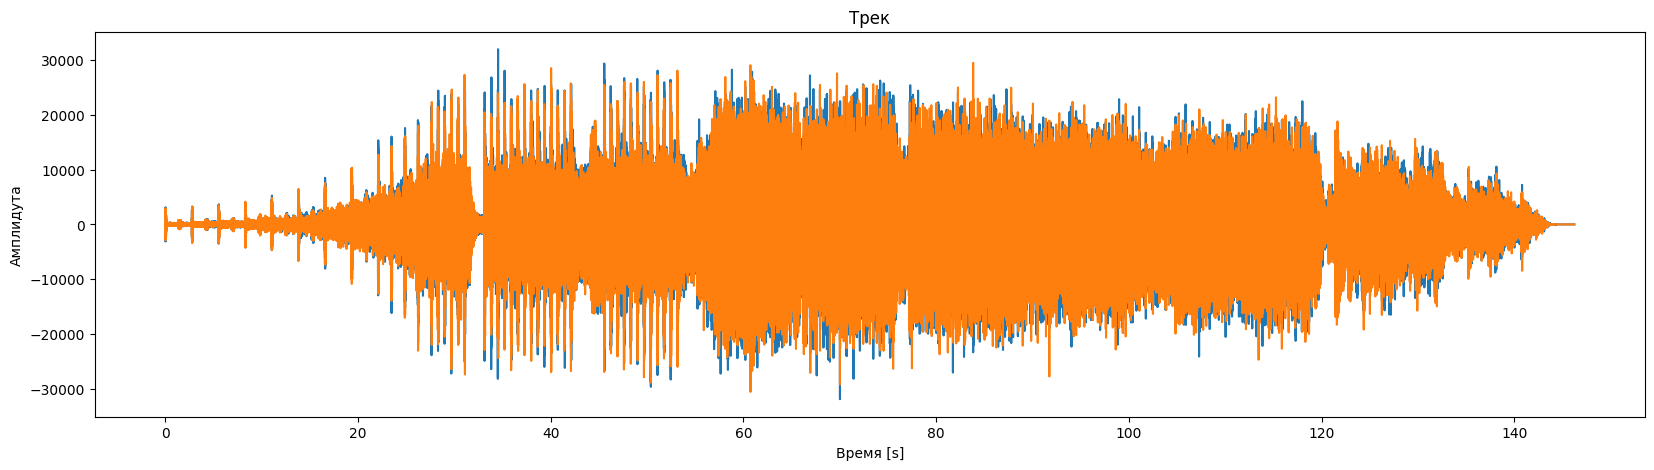

In [9]:
plt.figure(figsize=(20,5))
plt.plot(time, data)
plt.xlabel('Время [s]')
plt.ylabel('Амплидута')
plt.title('Трек')
plt.show()

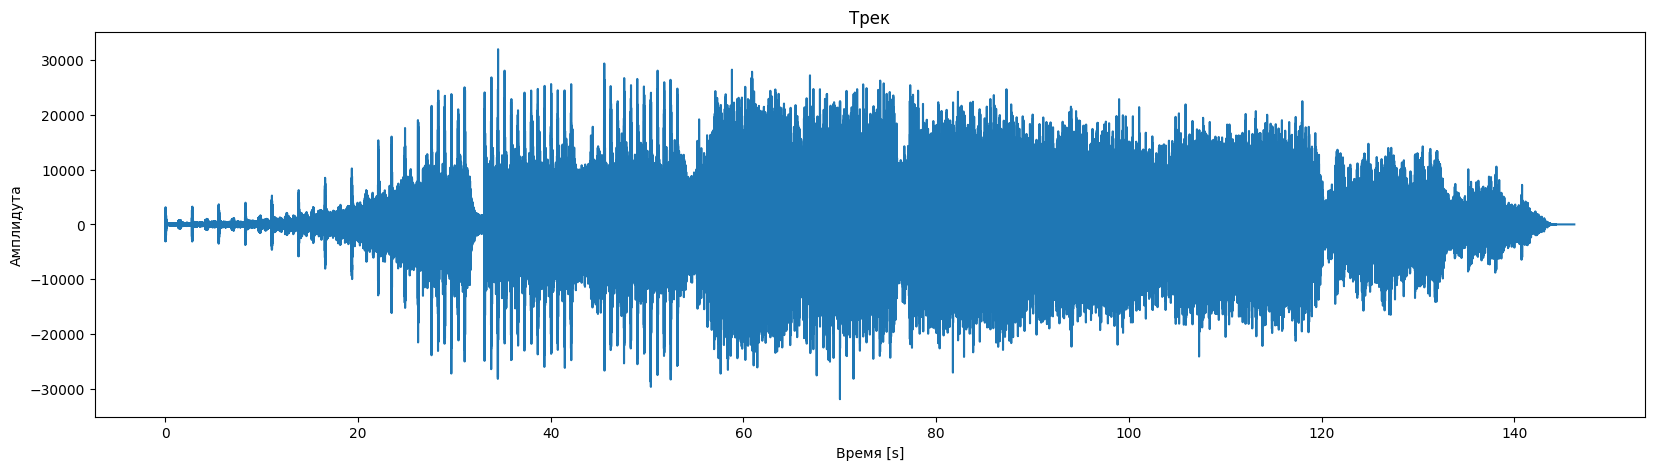

In [12]:
# Отдельно 1й канал

plt.figure(figsize=(20,5))
plt.plot(time, channel1)
plt.xlabel('Время [s]')
plt.ylabel('Амплидута')
plt.title('Трек')
plt.show()

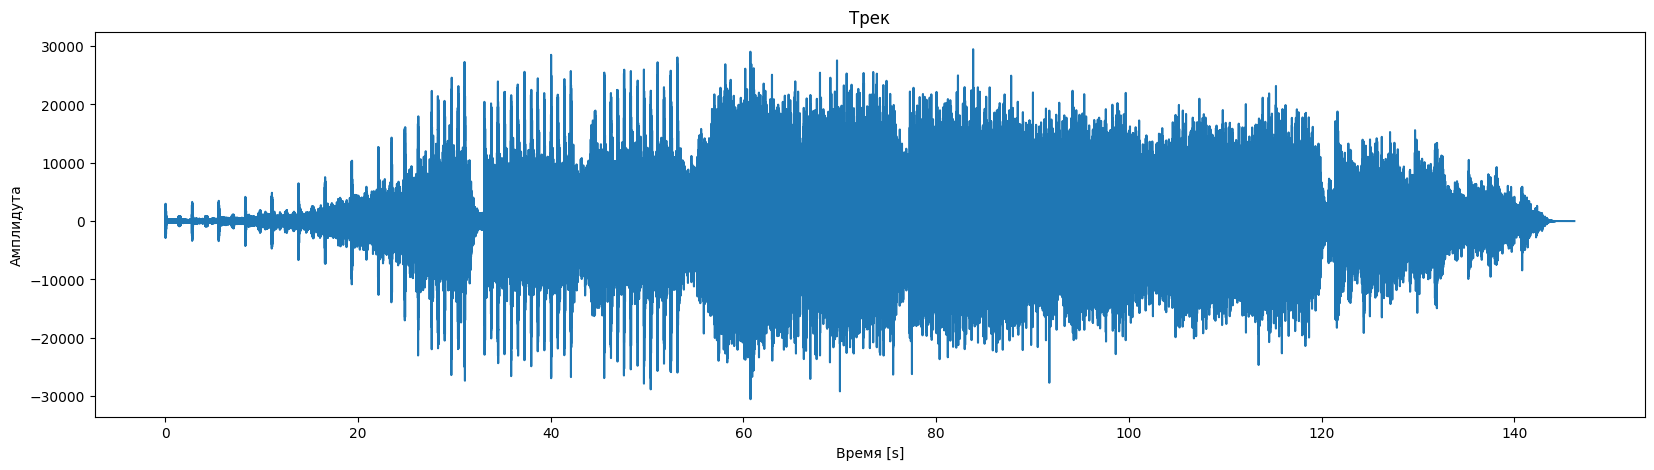

In [13]:
# Отдельно 2й канал

plt.figure(figsize=(20,5))
plt.plot(time, channel2)
plt.xlabel('Время [s]')
plt.ylabel('Амплидута')
plt.title('Трек')
plt.show()

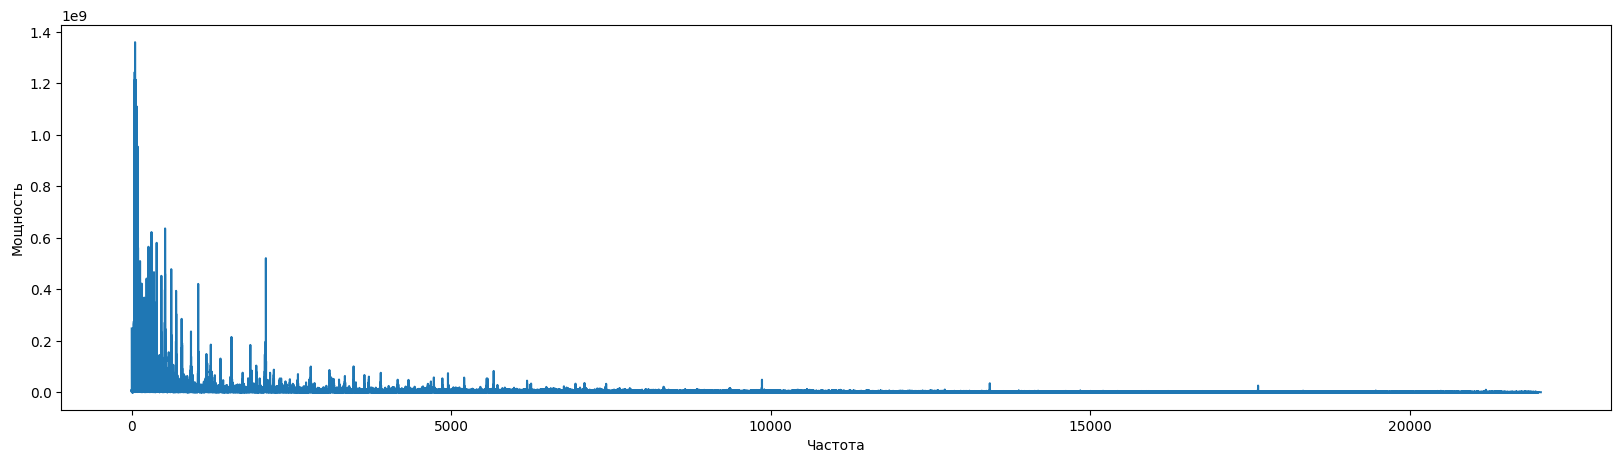

In [14]:
# 1й канал

from scipy.fft import  rfft, rfftfreq, irfft

plt.figure(figsize=(20,5))

# Число точек в normalized_tone
N = int(samplerate * duration)

yf = rfft(channel1)
xf = rfftfreq(N, 1 / samplerate)

plt.plot(xf, np.abs(yf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.show()

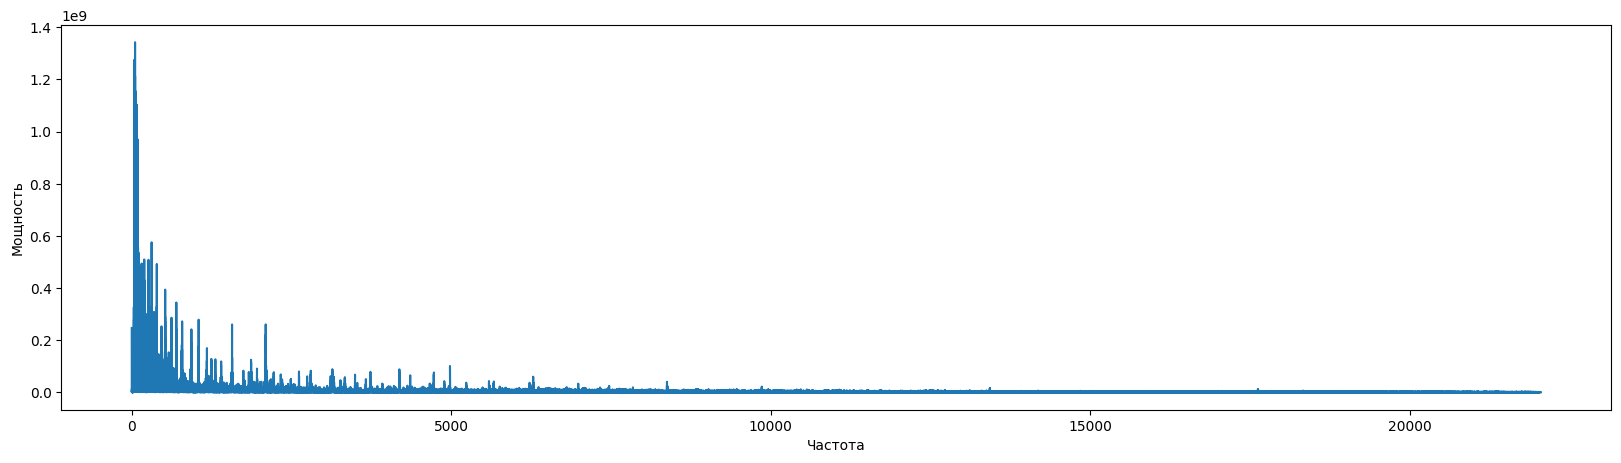

In [17]:
# 2й канал

# from scipy.fft import  rfft, rfftfreq, irfft

plt.figure(figsize=(20,5))

# Число точек в normalized_tone
N = int(samplerate * duration)

yf2 = rfft(channel2)
xf2 = rfftfreq(N, 1 / samplerate)

plt.plot(xf2, np.abs(yf2))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.show()

Частотные фильтры

In [21]:
points_per_freq = len(xf) / (max(xf))

target_idx_hf = int(points_per_freq * 880)
target_idx_lf = int(points_per_freq * 440)

yf_hf = yf.copy()
yf_lf = yf.copy()
yf_bp = yf.copy()
yf_zagr_filter = yf.copy()

yf_hf[:target_idx_hf] = 0

yf_lf[target_idx_lf:] = 0

yf_bp[:target_idx_lf] = 0
yf_bp[target_idx_hf:] = 0

yf_zagr_filter[target_idx_lf:target_idx_hf] = 0

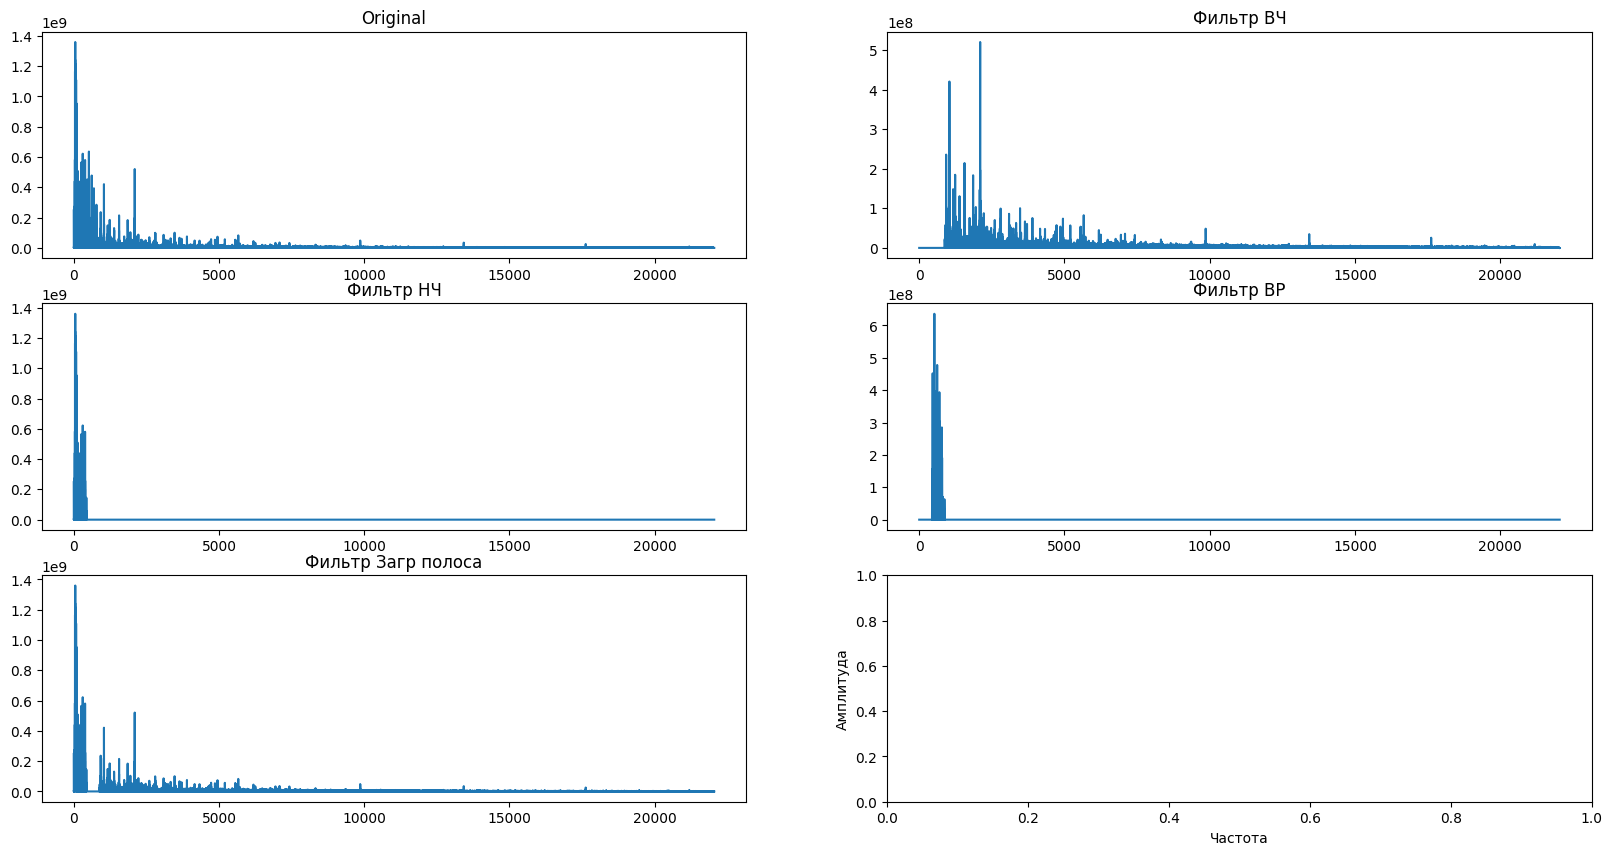

In [22]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,10))

ax[0,0].plot(xf, np.abs(yf))
ax[0,0].set_title("Original")

ax[0,1].plot(xf, np.abs(yf_hf))
ax[0,1].set_title("Фильтр ВЧ")

ax[1,0].plot(xf, np.abs(yf_lf))
ax[1,0].set_title("Фильтр НЧ")

ax[1,1].plot(xf, np.abs(yf_bp))
ax[1,1].set_title("Фильтр BP")

ax[2,0].plot(xf, np.abs(yf_zagr_filter))
ax[2,0].set_title("Фильтр Загр полоса")


plt.xlabel('Частота')
plt.ylabel('Амплитуда')

plt.show()

In [23]:
new_sig_hf = irfft(yf_hf)
new_sig_lf = irfft(yf_lf)
new_sig_bp = irfft(yf_bp)
new_sig_zagr = irfft(yf_zagr_filter)

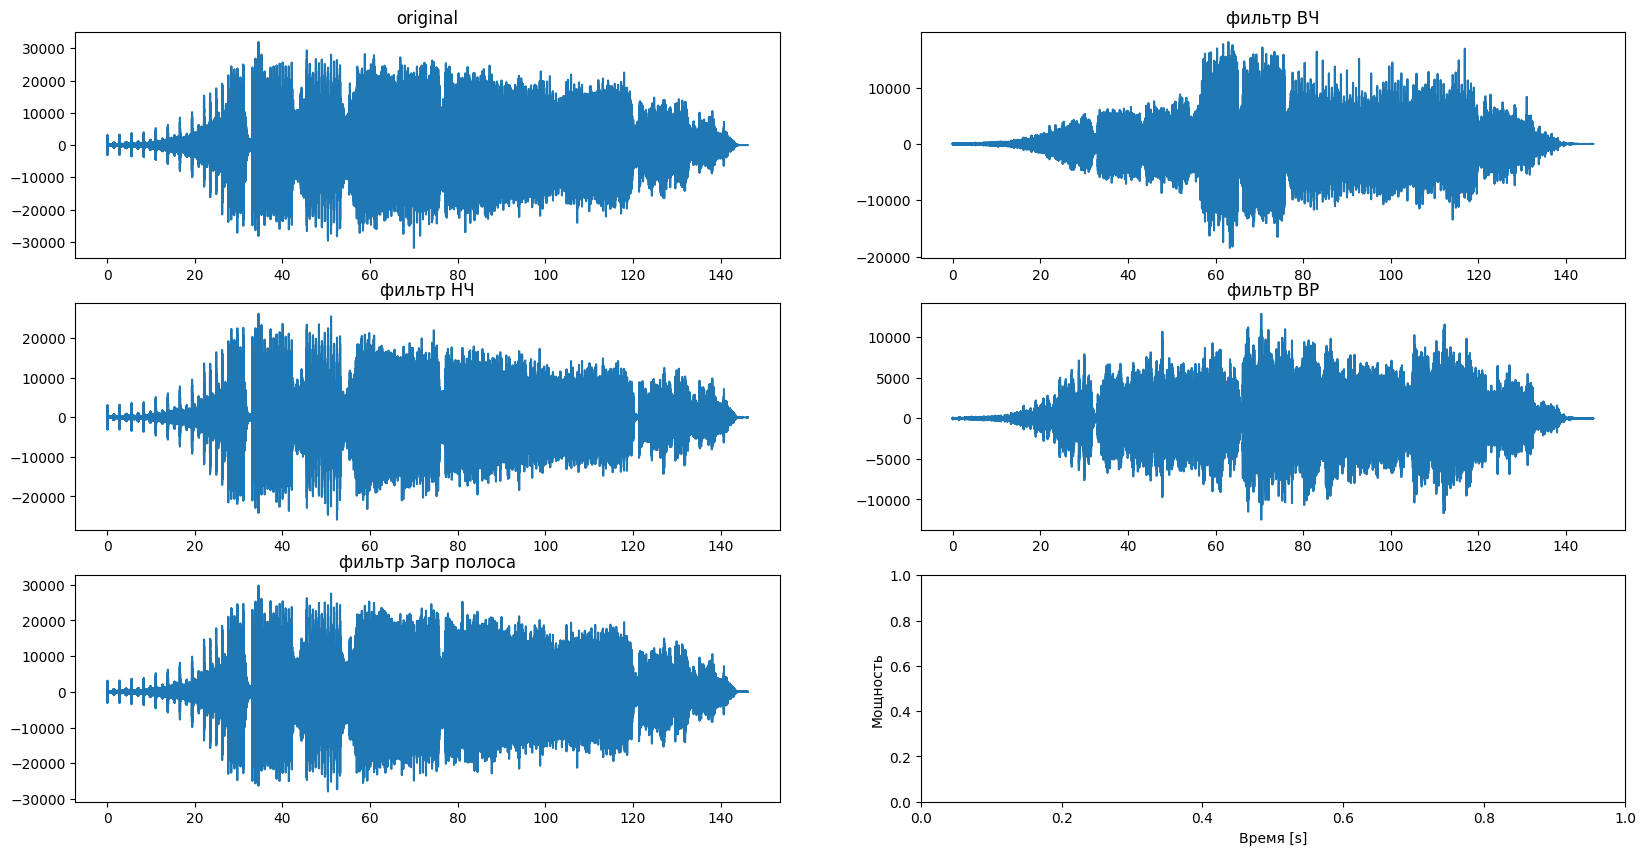

In [26]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,10))


ax[0,0].plot(time, channel1)
ax[0,0].set_title("original")

ax[0,1].plot(time[:len(time)], new_sig_hf)
ax[0,1].set_title("фильтр ВЧ")

ax[1,0].plot(time[:len(time)], new_sig_lf)
ax[1,0].set_title("фильтр НЧ")

ax[1,1].plot(time[:len(time)], new_sig_bp)
ax[1,1].set_title("фильтр BP")

ax[2,0].plot(time[:len(time)], new_sig_zagr)
ax[2,0].set_title("фильтр Загр полоса")

plt.xlabel('Время [s]')
plt.ylabel('Мощность')

plt.show()

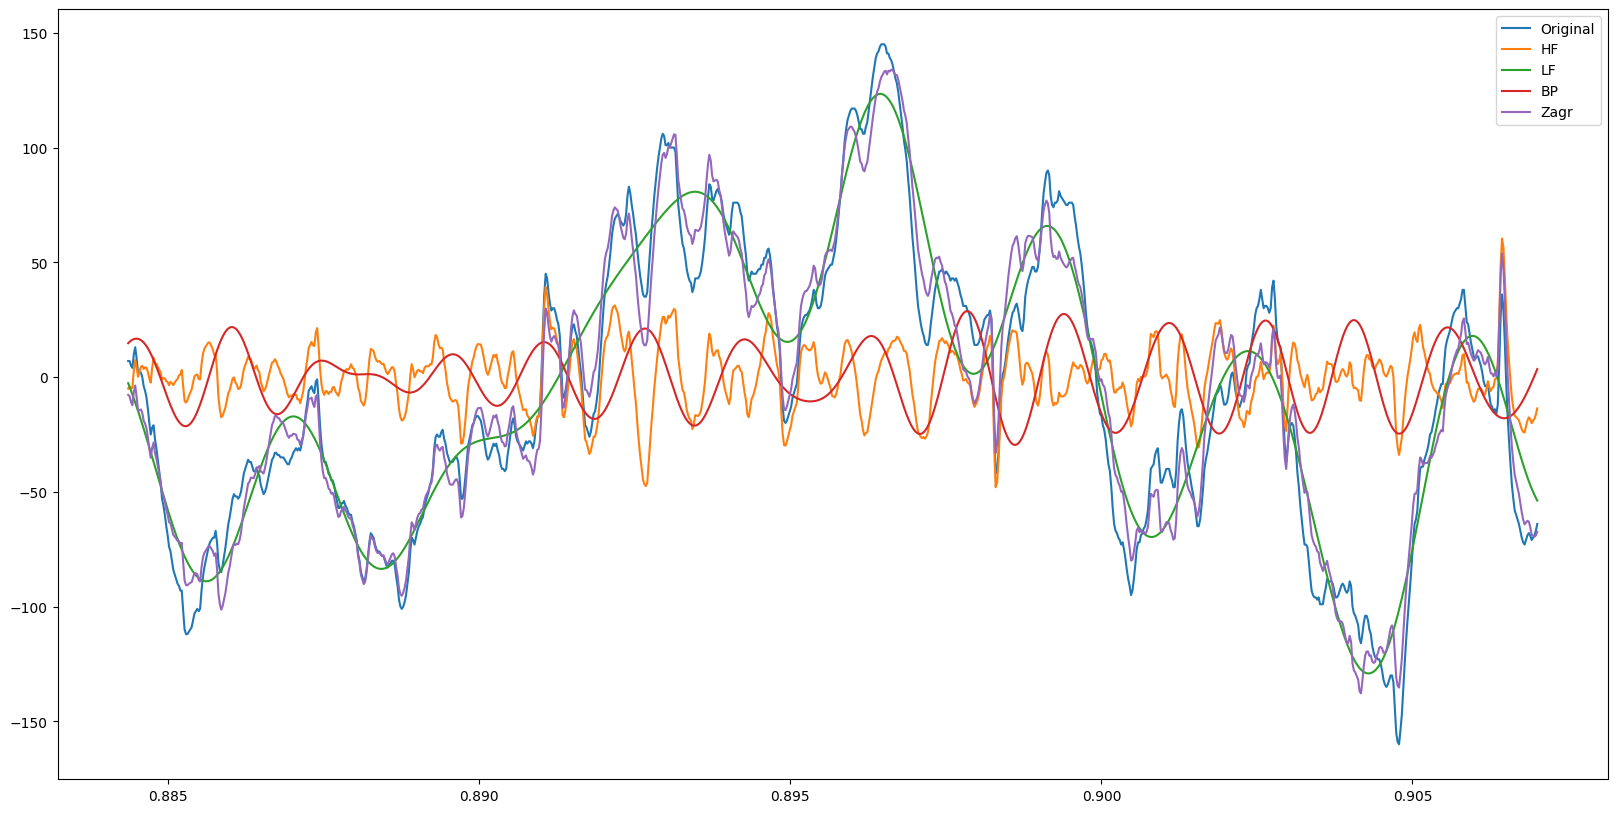

In [29]:
fig, ax = plt.subplots(figsize=(20,10))


original , = ax.plot(time[39000:40000], channel1[39000:40000], label='Original')
signal_hf , = ax.plot(time[39000:40000], new_sig_hf[39000:40000], label='HF')
signal_lf , = ax.plot(time[39000:40000], new_sig_lf[39000:40000], label='LF')
signal_bp , = ax.plot(time[39000:40000], new_sig_bp[39000:40000], label='BP')
signal_zagr, = ax.plot(time[39000:40000], new_sig_zagr[39000:40000], label='Zagr')


ax.legend(handles=[original, signal_hf, signal_lf, signal_bp,signal_zagr])

plt.show()

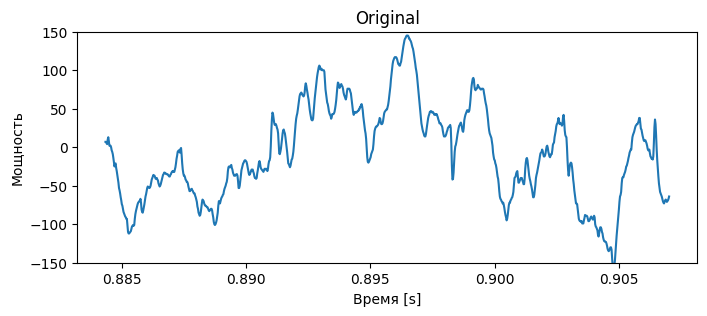

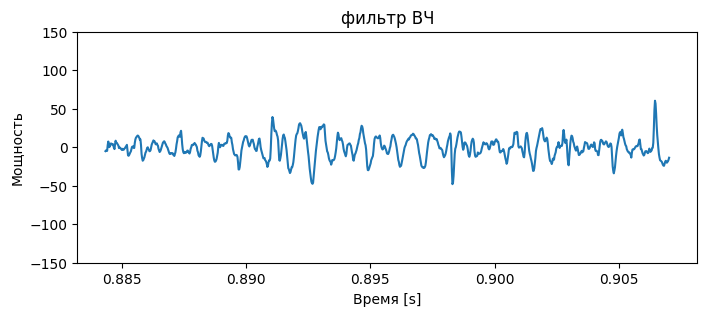

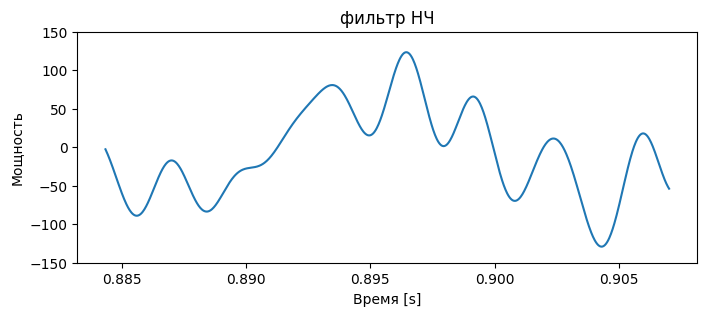

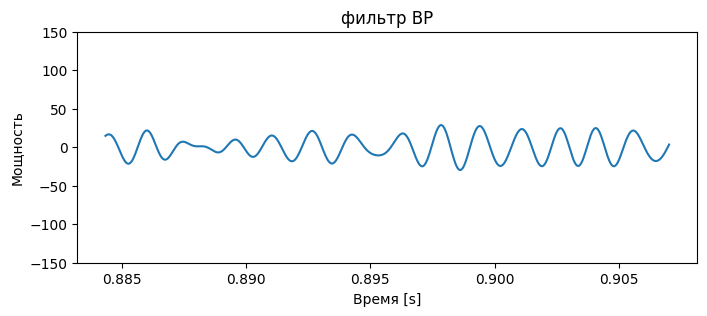

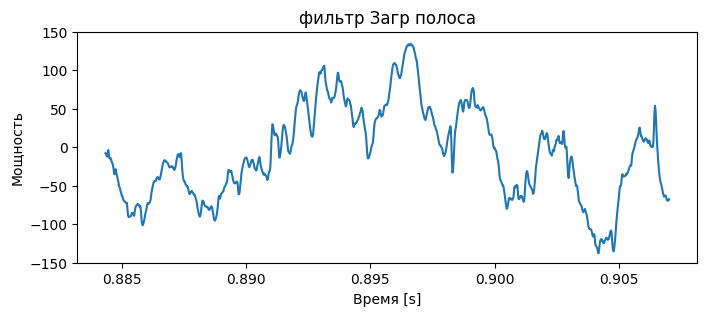

In [53]:
plt.figure(figsize=(8,3))


plt.plot(time[39000:40000], channel1[39000:40000])
plt.title('Original')
plt.ylim(-150, 150)
plt.xlabel('Время [s]')
plt.ylabel('Мощность')


plt.figure(figsize=(8,3))


plt.plot(time[39000:40000], new_sig_hf[39000:40000])
plt.title("фильтр ВЧ")
plt.ylim(-150, 150)
plt.xlabel('Время [s]')
plt.ylabel('Мощность')

plt.figure(figsize=(8,3))

plt.plot(time[39000:40000], new_sig_lf[39000:40000])
plt.title("фильтр НЧ")
plt.ylim(-150, 150)
plt.xlabel('Время [s]')
plt.ylabel('Мощность')

plt.figure(figsize=(8,3))

plt.plot(time[39000:40000], new_sig_bp[39000:40000])
plt.title("фильтр BP")
plt.ylim(-150, 150)
plt.xlabel('Время [s]')
plt.ylabel('Мощность')

plt.figure(figsize=(8,3))

plt.plot(time[39000:40000], new_sig_zagr[39000:40000])
plt.title("фильтр Загр полоса")
plt.ylim(-150, 150)
plt.xlabel('Время [s]')
plt.ylabel('Мощность')





plt.show()

In [54]:
# слушаем, что получилось
sd.play(channel1, samplerate)

In [55]:
# слушаем, что получилось
sd.play(new_sig_hf, samplerate)
 

In [56]:
# слушаем, что получилось
sd.play(new_sig_lf, samplerate, blocking = False)


In [57]:
# слушаем, что получилось
sd.play(new_sig_bp, samplerate)
 

In [58]:
# слушаем, что получилось
sd.play(new_sig_zagr, samplerate)

In [59]:
sd.stop()

😒😒😒

Экспоненциальное сглаживание

In [60]:
def exponential_smoothing(values, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [values[0], values[1]]  # first value is same as series
    
    for n in range(1, len(values)):
        result.append(alpha * result[n] + (1 - alpha) * values[n-1])
    
    return result

In [61]:
def plot_exponential_smoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas

        series - dataset with timestamps
        alphas - list of floats, smoothing parameters

    """
    with plt.style.context("seaborn-v0_8-white"):
        

        plt.figure(figsize=(15, 7))

        plt.plot(series[1], "c", label="Actual")

        for alpha in alphas:
            plt.plot(
                exponential_smoothing(series[1], alpha), label="Alpha {}".format(alpha)
            )

      
        plt.legend(loc="best")
        plt.axis("tight")
        plt.title("Exponential Smoothing")
        plt.grid(True)

In [62]:
def double_exponential_smoothing(values, alpha, beta):
    result = [values[0]]
    for n in range(1, len(values)+1):
        if n == 1:
            level, trend = values[0], values[1] - values[0]
        if n >= len(values): # прогнозируем
            value = values[-1]
        else:
            value = values[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

In [63]:
# вспомогательная функция, рассчитываем тренд

def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen

In [64]:
# рассчитываем сезонные компоненты

def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series) / slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen * j:slen * j + slen]) / float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen * j + i] - season_averages[j]
        seasonals[i] = sum_of_vals_over_avg / n_seasons
    return seasonals

In [65]:
# ну и само сглаживание и предсказание

def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

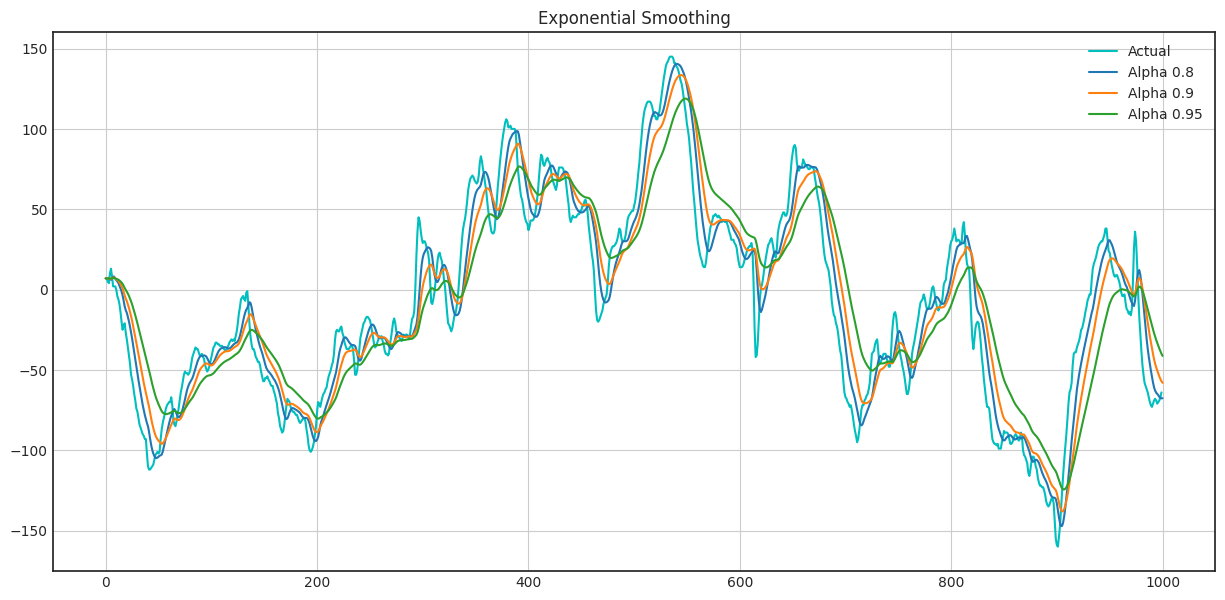

In [66]:
signal_part = channel1[39000:40000]
time_part = time[39000:40000]
 
series = pd.Series([time[39000:40000], channel1[39000:40000]])  

plot_exponential_smoothing(series, alphas=[0.8,0.9,0.95])

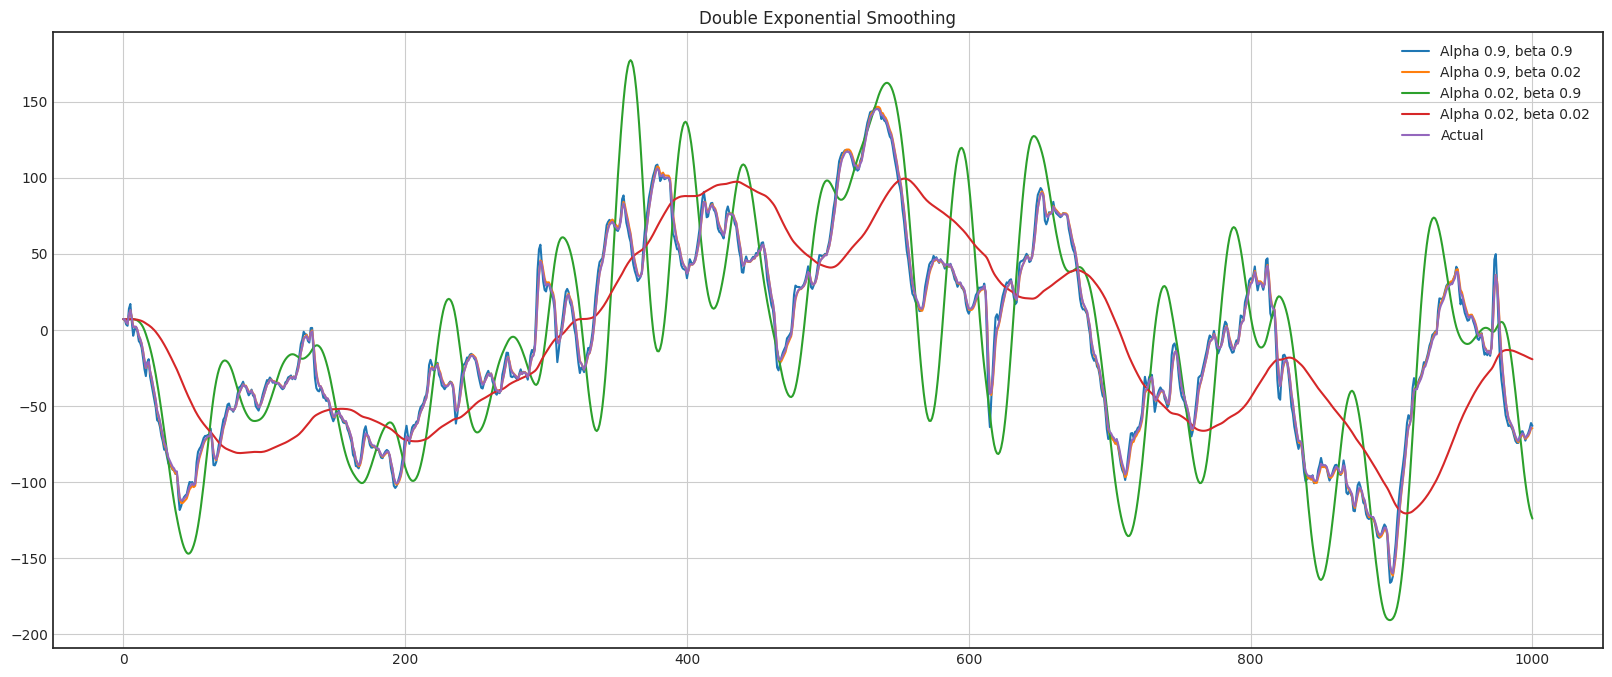

In [67]:
with plt.style.context('seaborn-v0_8-white'):
    plt.figure(figsize=(20, 8))
    for alpha in [0.9, 0.02]:
        for beta in [0.9, 0.02]:
            plt.plot(double_exponential_smoothing(signal_part, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(signal_part, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

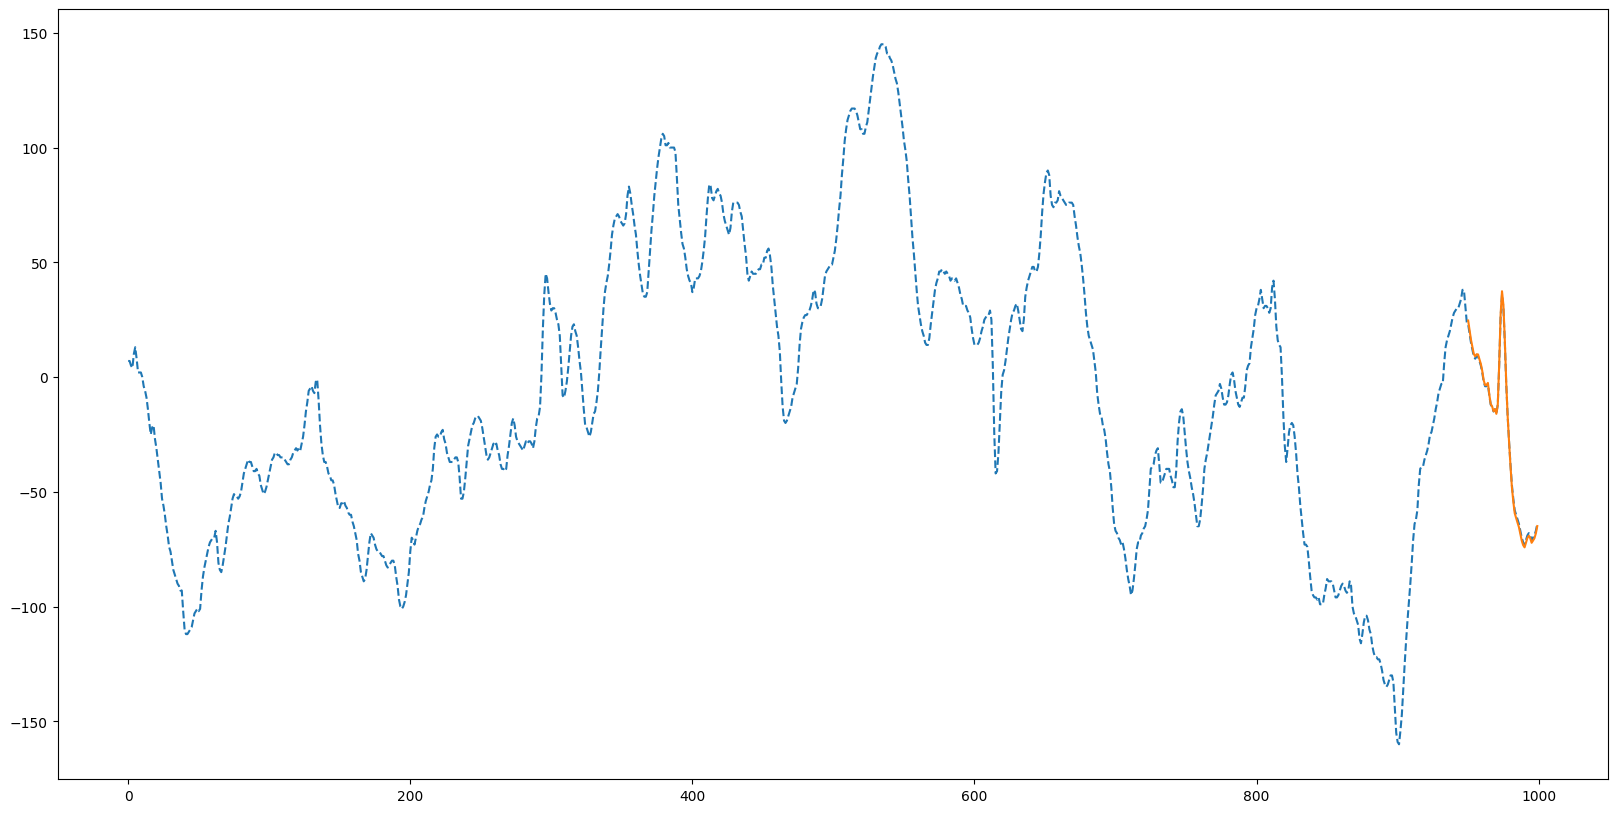

In [81]:
# предсказываем следующие 50 точек
plt.figure(figsize=(20,10))
count = 50
ind = len(signal_part) - count
vals = triple_exponential_smoothing(signal_part, 12, 0.716, 0.029, 0.993, count)
# вырезаем отрезок по x, чтобы посмотреть
x = range(ind + count)
x_pr = range(ind, ind + count)
# отрисовываем. Сплошная линия - предсказание.
plt.plot(x[:], signal_part[:], linestyle='dashed')
plt.plot(x_pr, vals[ind:ind+count])

Фильтры Чебышева и Баттерворта

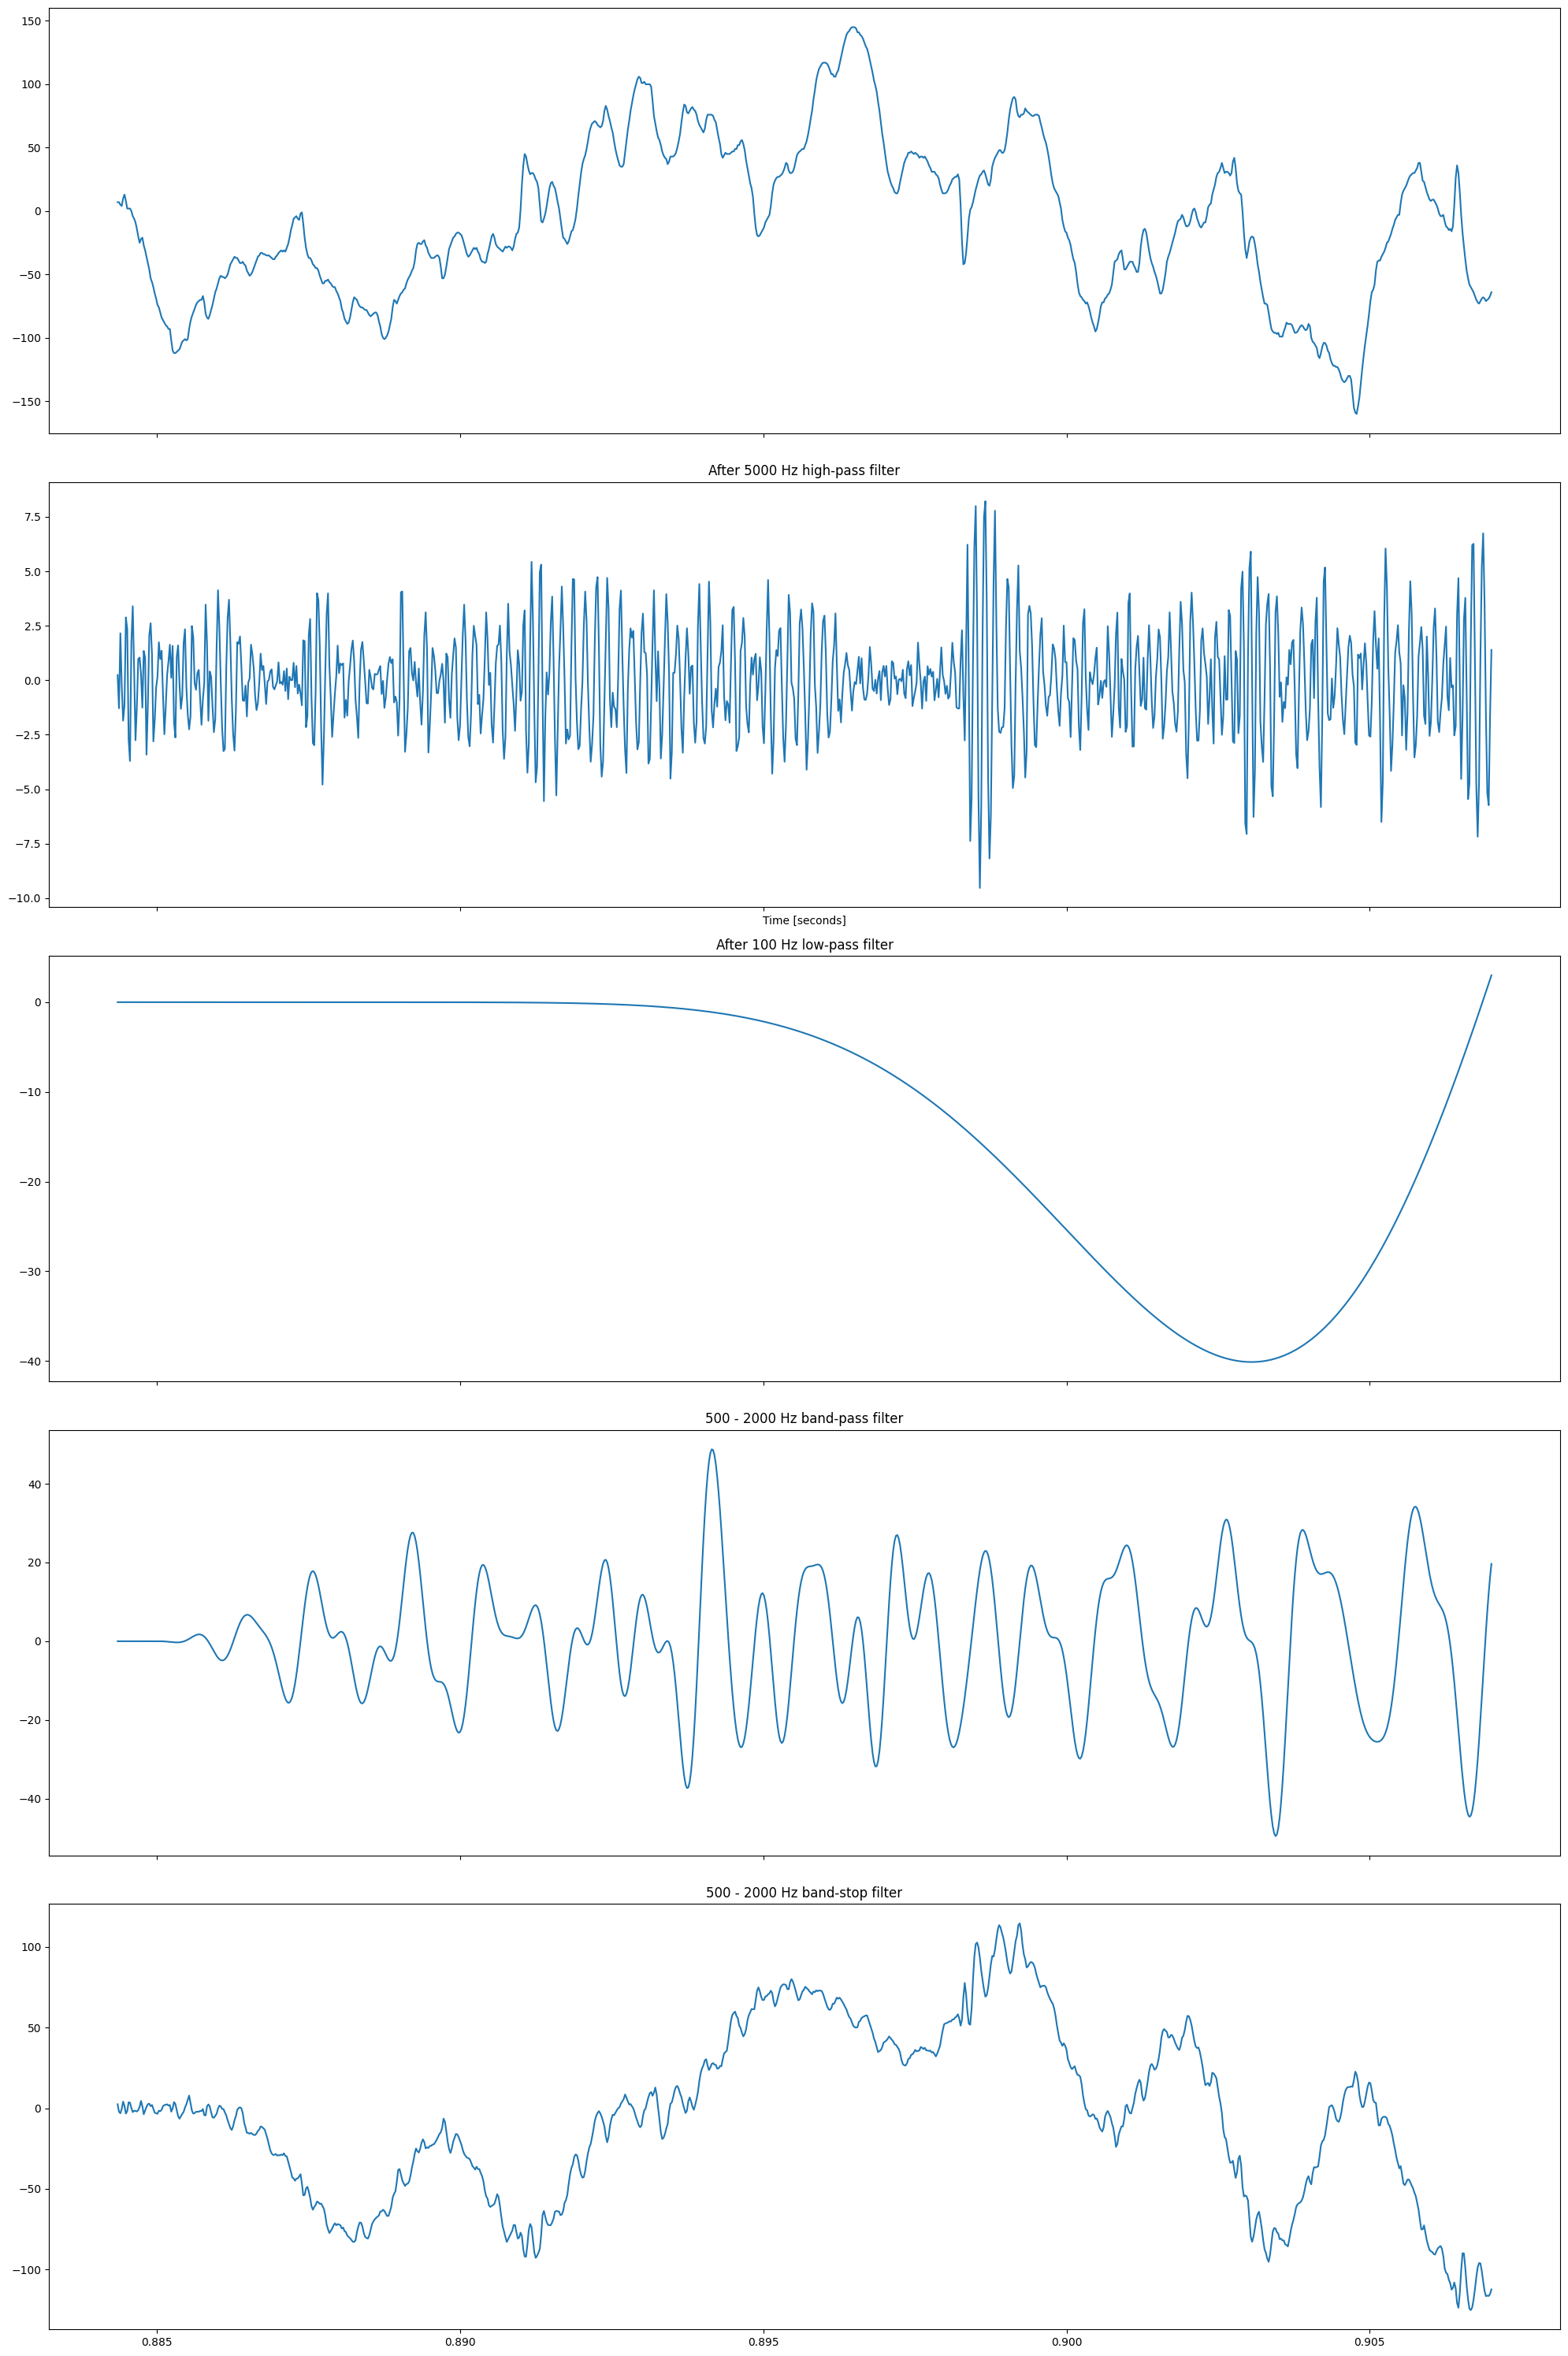

In [69]:

# high pass
sos_hp = signal.cheby1(10, 1, 5000, 'hp', fs=samplerate, output='sos')
filtered_hp = signal.sosfilt(sos_hp, signal_part)


# low pass
sos_lp = signal.cheby1(10, 1, 100, 'lp', fs=samplerate, output='sos')
filtered_lp = signal.sosfilt(sos_lp, signal_part)


# band pass
sos_bp = signal.cheby1(10, 1, [500, 2000], 'bp', fs=samplerate, output='sos')
filtered_bp = signal.sosfilt(sos_bp, signal_part)

# band pass
sos_bs = signal.cheby1(10, 1, [500, 2000], 'bs', fs=samplerate, output='sos')
filtered_bs = signal.sosfilt(sos_bs, signal_part)


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex=True, figsize=(20,30))
ax1.plot(time_part, signal_part)

ax2.plot(time_part, filtered_hp)
ax2.set_title('After 5000 Hz high-pass filter')

ax3.plot(time_part, filtered_lp)
ax3.set_title('After 100 Hz low-pass filter')

ax4.plot(time_part, filtered_bp)
ax4.set_title('500 - 2000 Hz band-pass filter')
 
ax5.plot(time_part, filtered_bs)
ax5.set_title('500 - 2000 Hz band-stop filter')

ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

In [70]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

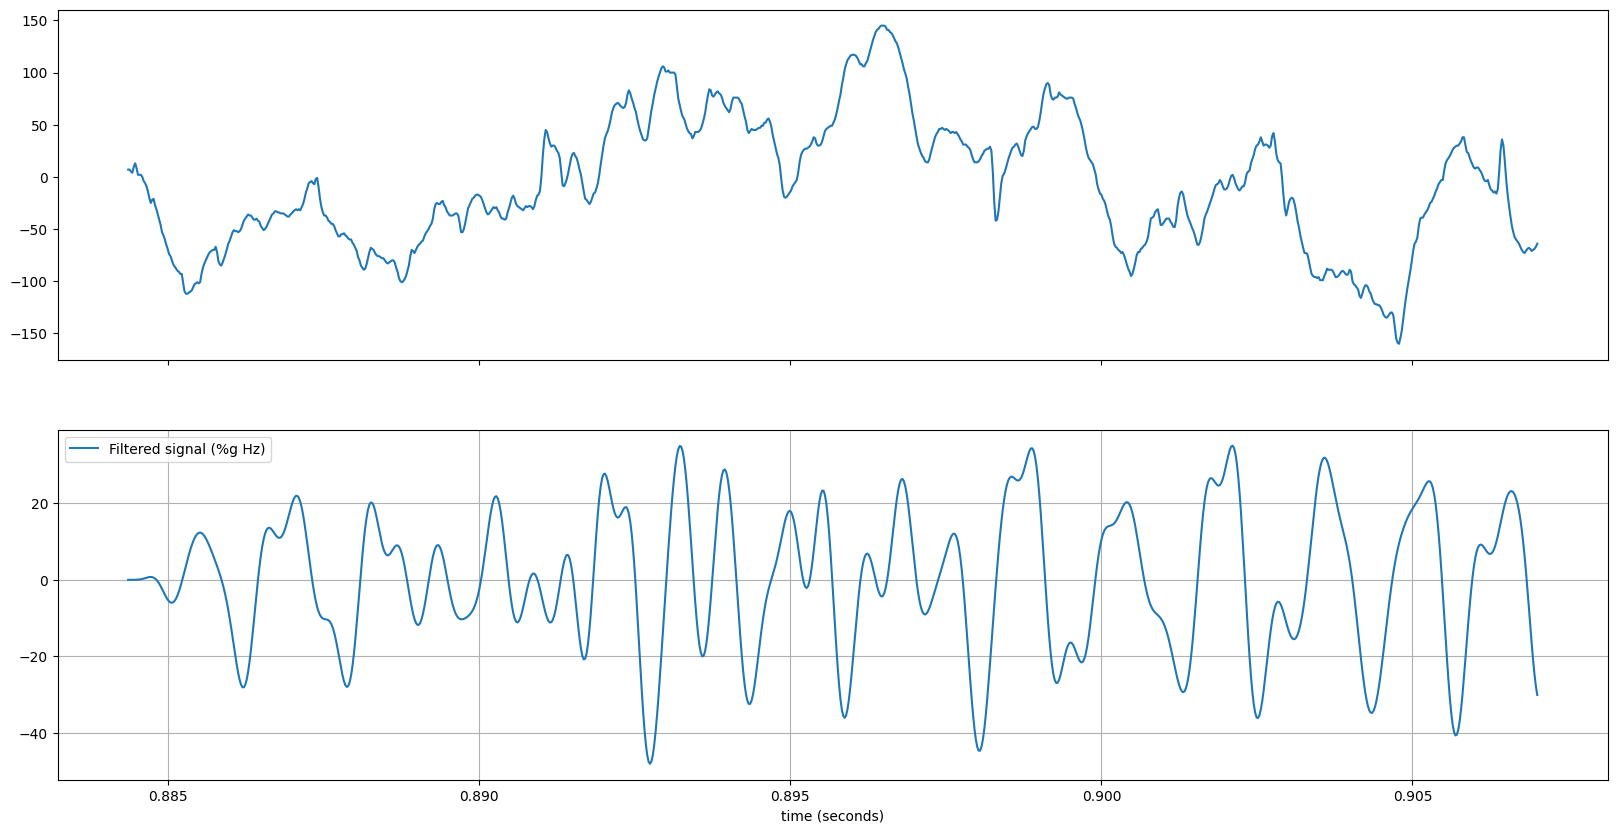

In [71]:
# Sample rate and desired cutoff frequencies (in Hz).
fs = samplerate

lowcut = 500.0
highcut = 2000.0


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20,10))

ax1.plot(time_part, signal_part, label='Noisy signal')

y = butter_bandpass_filter(signal_part, lowcut, highcut, fs, order=6)
ax2.plot(time_part, y, label='Filtered signal (%g Hz)')

plt.xlabel('time (seconds)')
 
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()